# House Price Prediction: EDA and Data Cleaning

---

## Overview
This notebook covers the initial exploratory data analysis (EDA) and data cleaning steps for the House Price Prediction project.  
We will load the data, explore its structure, visualize key features, identify and handle missing values and outliers, and prepare the data for further processing.



---

## Steps:
1. Data Loading
2. Initial Exploration
3. Visual EDA
4. Missing Values & Outliers
5. Data Cleaning
6. Save Cleaned Data for Next Steps
7. Summary & Next Steps

---

## 1. Data Loading
Let's load the training data using pandas.



In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load train data
df = pd.read_csv('../data/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 2. Initial Exploration
Let's explore the structure and summary statistics of the data.

In [24]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [25]:
# Summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


## 3. Visual EDA
Let's visualize the target variable and feature relationships.

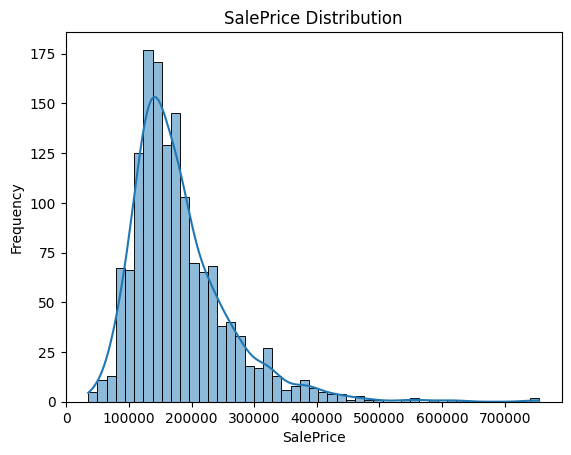

In [26]:
# Target variable distribution
sns.histplot(df['SalePrice'], kde=True)
plt.title('SalePrice Distribution')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

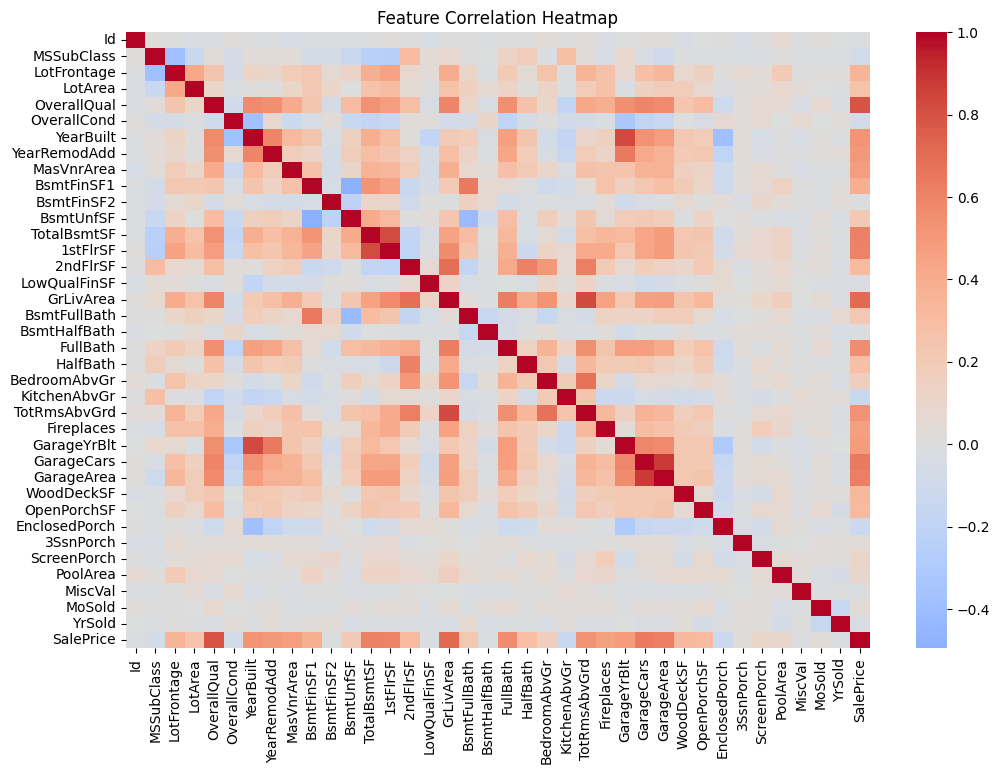

In [27]:
# Correlation heatmap
corr = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

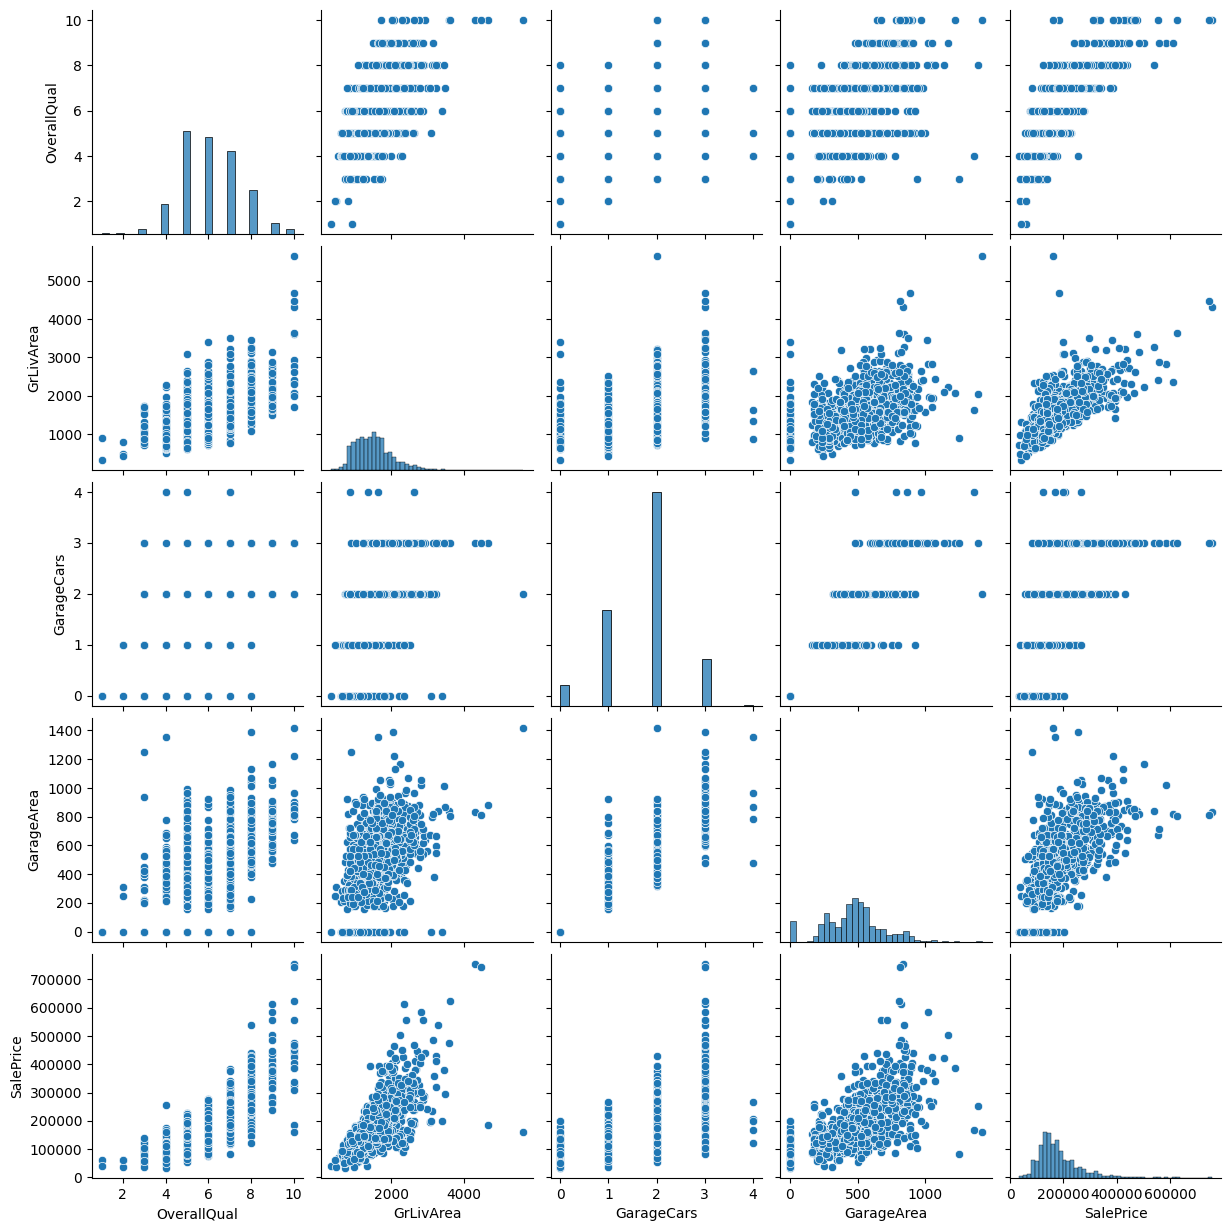

In [28]:
# Pairplot for top correlated features
top_corr = corr['SalePrice'].abs().sort_values(ascending=False).index[1:5]
sns.pairplot(df, vars=top_corr.tolist() + ['SalePrice'])
plt.show()

## 4. Missing Values & Outliers
Let's identify missing values and outliers in the data.

In [29]:
# Missing values
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

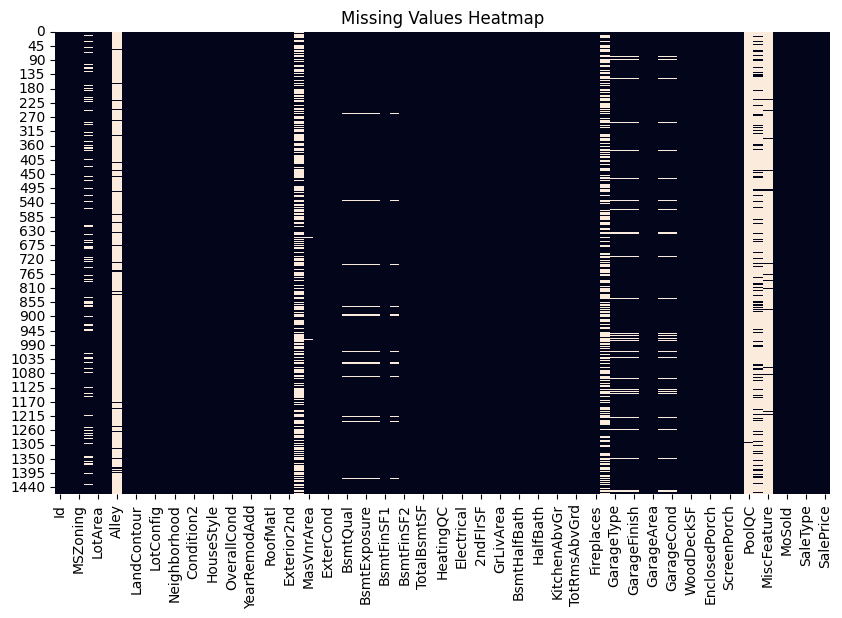

In [30]:
# Visualize missing data
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

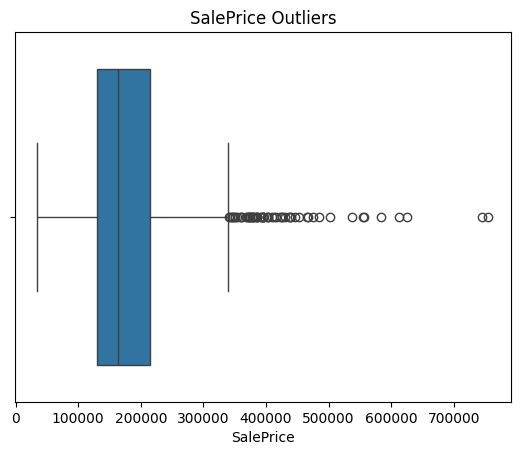

In [31]:
# Outlier detection for SalePrice
sns.boxplot(x=df['SalePrice'])
plt.title('SalePrice Outliers')
plt.show()

## 5. Data Cleaning
Let's clean the data by handling missing values and removing outliers.

In [32]:
# Handle missing values
df_clean = df.copy()
for col in df_clean.columns:
    if df_clean[col].dtype == 'object':
        df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])
    else:
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# Remove outliers in SalePrice (3 std from mean)
mean = df_clean['SalePrice'].mean()
std = df_clean['SalePrice'].std()
df_clean = df_clean[(df_clean['SalePrice'] > mean - 3*std) & (df_clean['SalePrice'] < mean + 3*std)]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1438 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1438 non-null   int64  
 1   MSSubClass     1438 non-null   int64  
 2   MSZoning       1438 non-null   object 
 3   LotFrontage    1438 non-null   float64
 4   LotArea        1438 non-null   int64  
 5   Street         1438 non-null   object 
 6   Alley          1438 non-null   object 
 7   LotShape       1438 non-null   object 
 8   LandContour    1438 non-null   object 
 9   Utilities      1438 non-null   object 
 10  LotConfig      1438 non-null   object 
 11  LandSlope      1438 non-null   object 
 12  Neighborhood   1438 non-null   object 
 13  Condition1     1438 non-null   object 
 14  Condition2     1438 non-null   object 
 15  BldgType       1438 non-null   object 
 16  HouseStyle     1438 non-null   object 
 17  OverallQual    1438 non-null   int64  
 18  OverallCond  

## 6. Save Cleaned Data for Next Steps
We will save the cleaned data to use in the next notebook.

In [33]:
df_clean.to_csv('../data/cleaned_train.csv', index=False)
print("Cleaned data saved to ../data/cleaned_train.csv")

Cleaned data saved to ../data/cleaned_train.csv


## 7. Summary & Next Steps
- Explored and visualized the data  
- Identified and handled missing values and outliers  
- Data is now ready for feature engineering and modeling  

**Next:** Feature engineering and selection in the next notebook.